<a href="https://colab.research.google.com/github/Snehalwadile/Time-Series-Model/blob/main/Time%20series-LSTM%20(Long%20Short-Term%20Memory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 8.2964e-04
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.4189e-05
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 1.1748e-05
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1.2811e-05
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.3517e-05
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 1.1112e-05
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 1.0790e-05
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 1.2059e-05
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 1.0308e-05
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 1.2047e-05
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 1.1468e-05
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 1.2295e-05
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 1.1882e-05
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss:

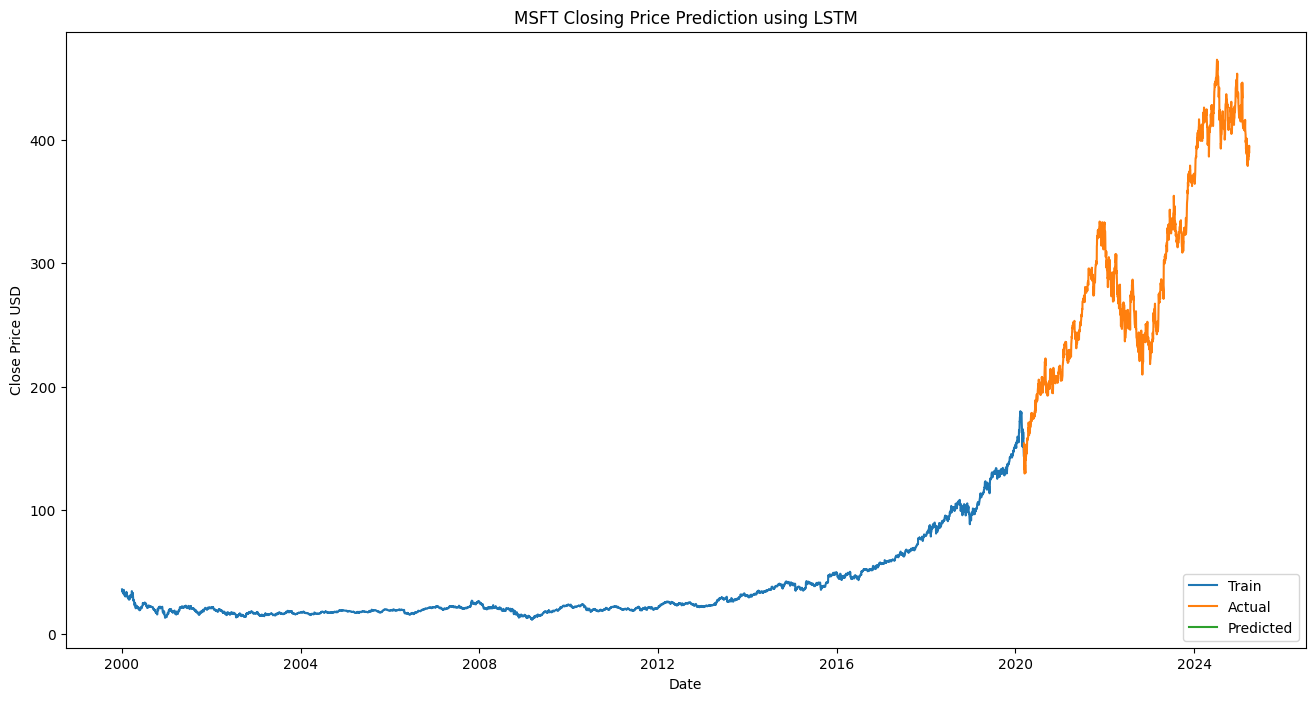

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math
from datetime import datetime

# --- 1. Download Historical Data ---
ticker = "MSFT"
start_date = "2000-01-01"
# Use today's date as end date
end_date = datetime.today().strftime('%Y-%m-%d')
print(f"Downloading data for {ticker} from {start_date} to {end_date}...")
data = yf.download(ticker, start=start_date, end=end_date)

# Use the 'Close' price for forecasting
dataset = data[['Close']].values  # shape (n_samples, 1)

# --- 2. Data Preprocessing ---
# Scale data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split into training and testing sets (e.g., 80% training, 20% testing)
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]

# Create a function to prepare the dataset with a sliding window
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Choose a look-back window (e.g., 60 days)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# --- 3. Build the LSTM Model ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
epochs = 20
batch_size = 64
print("Training the model...")
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# --- 4. Prepare Test Data & Make Predictions ---
# Create test dataset using the last 'time_step' days of training data as a starting point
test_data = scaled_data[training_data_len - time_step:, :]
X_test, y_test = create_dataset(test_data, time_step)

# Reshape X_test for the LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the model's predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test for evaluation (note: y_test was scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE as evaluation metric
rmse = math.sqrt(mean_squared_error(y_test_inv, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# --- 5. Plot the Results ---
# Prepare data for plotting: training, validation, and predictions
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = np.nan

# Since predictions align with the test period, create a DataFrame for plotting
pred_df = pd.DataFrame(predictions, index=data.index[training_data_len:], columns=['Predictions'])
valid.update(pred_df)

plt.figure(figsize=(16, 8))
plt.title('MSFT Closing Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'], label='Train')
plt.plot(data[training_data_len:]['Close'], label='Actual')
plt.plot(valid['Predictions'], label='Predicted')
plt.legend(loc='lower right')
plt.show()


In [2]:
# prompt: pip install yfinance matplotlib scikit-learn tensorflow

!pip install yfinance matplotlib scikit-learn tensorflow

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 0.0018
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 1.6109e-05
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 1.4297e-05
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 1.3218e-05
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 1.4565e-05
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 1.5698e-05
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.2305e-05
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 1.1817e-05
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 1.8902e-05
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 1.6295e-05
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 1.2135e-05
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 1.6928e-05
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 1.1389e-05
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 1.1150e-05
Epoch 15/20
79

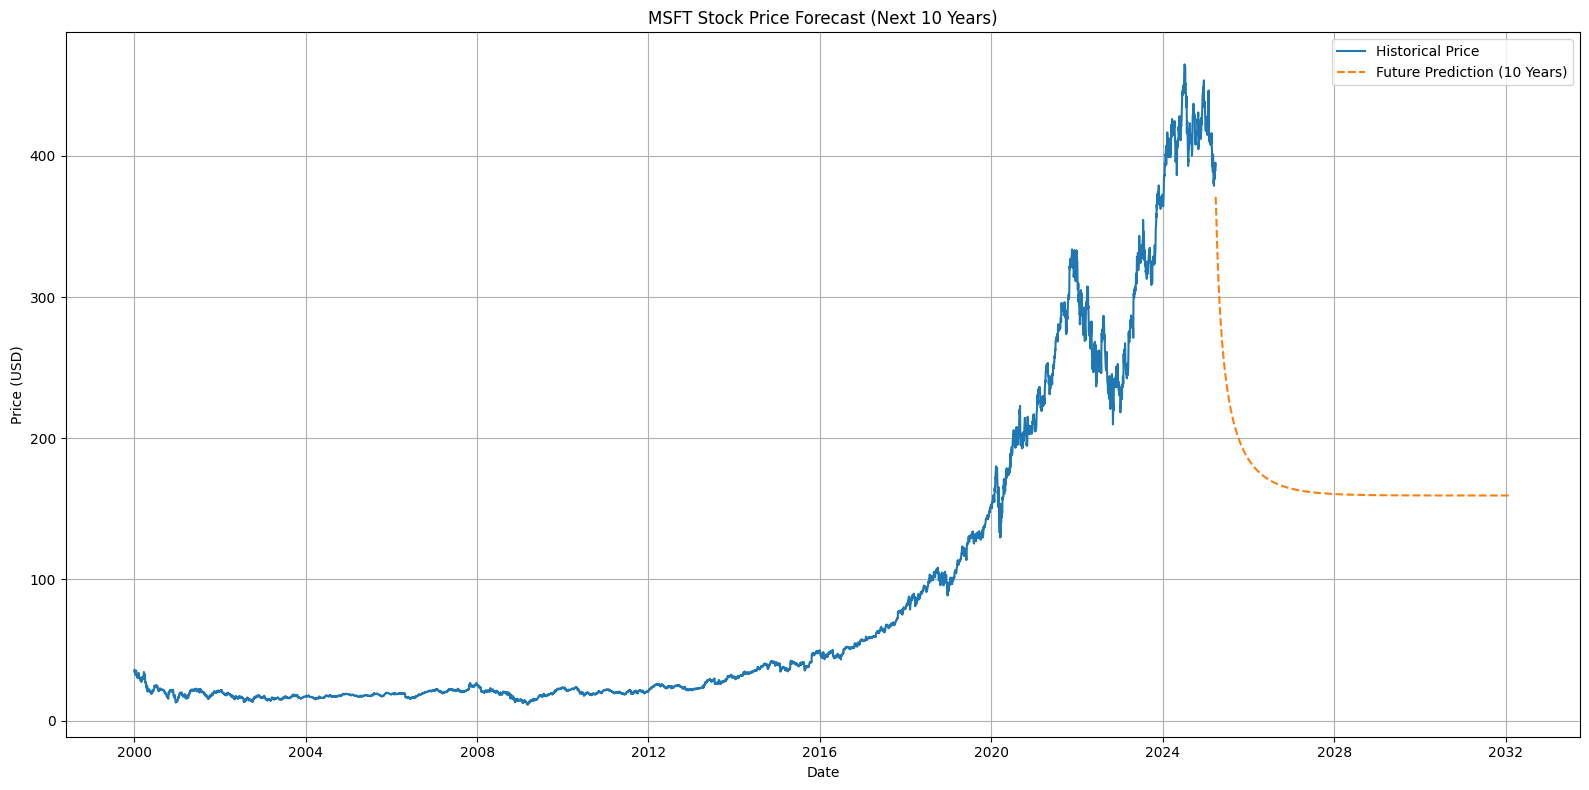

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math
from datetime import datetime, timedelta

# 1. Download Historical Data
ticker = "MSFT"
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
print(f"Downloading data for {ticker} from {start_date} to {end_date}...")
data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data[['Close']].values

# 2. Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Split data
time_step = 60
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[:training_data_len]

def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, time_step)
X_train = np.reshape(X_train, (X_train.shape[0], time_step, 1))

# 3. Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# 4. Historical Prediction on Test Data
test_data = scaled_data[training_data_len - time_step:]
X_test, y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = math.sqrt(mean_squared_error(y_test_inv, predictions))
print("RMSE on test data:", rmse)

# 5. Predict Future (Next 10 Years ≈ 2520 trading days)
future_days = 2520
last_sequence = scaled_data[-time_step:]
future_predictions = []

for _ in range(future_days):
    input_seq = last_sequence.reshape(1, time_step, 1)
    next_pred = model.predict(input_seq)[0, 0]
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[1:], [[next_pred]], axis=0)

# Inverse scale future predictions
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 6. Create Future Dates for Plotting
last_date = data.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days+1)]
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': future_predictions_inv.flatten()})
future_df.set_index('Date', inplace=True)

# 7. Plot Actual + Future
plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Historical Price')
plt.plot(future_df['Predicted_Price'], label='Future Prediction (10 Years)', linestyle='--')
plt.title(f'{ticker} Stock Price Forecast (Next 10 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta
from google.colab import files

# --- 1. Upload Historical Data ---
print("Please upload MSFT_Historical_Data.csv")
uploaded = files.upload()

# Read the uploaded CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, parse_dates=['Date'])
df = df[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# --- 2. Scale the 'Close' prices ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# --- 3. Create dataset (sliding window) ---
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 4. Build and train LSTM model ---
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=64, verbose=1)

# --- 5. Predict from tomorrow to 26-Mar-2034 ---
forecast_start_date = datetime.today() + timedelta(days=1)
forecast_end_date = datetime(2034, 3, 26)

# Approximate number of business days (weekends excluded)
future_days = np.busday_count(forecast_start_date.date(), forecast_end_date.date())

# Use last 60 days from original dataset as seed input
last_sequence = scaled_data[-time_step:]

predicted_scaled = []

for _ in range(future_days):
    input_seq = last_sequence.reshape(1, time_step, 1)
    next_pred = model.predict(input_seq, verbose=0)[0][0]
    predicted_scaled.append(next_pred)
    last_sequence = np.append(last_sequence[1:], [[next_pred]], axis=0)

# Inverse transform predictions
predicted_prices = scaler.inverse_transform(np.array(predicted_scaled).reshape(-1, 1))

# --- 6. Generate future dates (weekdays only) ---
future_dates = pd.bdate_range(start=forecast_start_date, periods=future_days)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': predicted_prices.flatten()})
future_df.set_index('Date', inplace=True)

# --- 7. Plot results ---
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Historical Price')
plt.plot(future_df['Predicted_Price'], label='Forecasted Price (2025–2034)', linestyle='--')
plt.title("MSFT Stock Forecast (From 2025-03-27 to 2034-03-26)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 8. Optional: Save to CSV ---
future_df.to_csv("MSFT_Prediction_2025_to_2034.csv")
print("Forecast saved as MSFT_Prediction_2025_to_2034.csv")


Please upload MSFT_Historical_Data.csv


Saving MSFT_Historical_Data.csv to MSFT_Historical_Data.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.0130
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 1.3289e-04
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 1.3105e-04
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 1.5242e-04
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 1.2425e-04
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 1.2974e-04
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 1.2508e-04
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 1.2584e-04
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 1.1144e-04
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 1.3624e-04
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 1.1048e-04
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 9.6059e-05
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 9.8050e-05
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 8.5135e-05
Epoch 15/